In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get

In [2]:
# Make a request
url = 'https://covid19.ncdc.gov.ng'
response = get(url, headers = {"Accept-Language": "en-US, en;q=0.5"})

In [3]:
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
<meta http-equiv="content-type" content="text/html;charset=UTF-8" />
<head>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui">
<meta


In [4]:
# Create a beautifulsoup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [5]:
# Locate table
covid_table = html_soup.find('div', class_ = 'table-responsive')

In [6]:
# Scrape table headers and pass into a list
table_heading = covid_table.thead.find_all('th')
headings = []
for th in table_heading:
    headings.append(th.text)
print(headings)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [7]:
# Scrape table rows and pass into a list
table_rows = []
for i in covid_table.tbody.find_all('tr'):
    table_rows.append(i.text.replace('\n', ' ').strip())
table_rows

['Lagos  7,616  6,186  1,323  107',
 'FCT  1,391  972  391  28',
 'Kano  1,160  414  696  50',
 'Rivers  696  397  273  26',
 'Edo  695  510  154  31',
 'Oyo  661  410  242  9',
 'Ogun  586  257  315  14',
 'Kaduna  490  194  286  10',
 'Borno  457  111  316  30',
 'Gombe  443  260  171  12',
 'Bauchi  430  131  288  11',
 'Katsina  414  159  233  22',
 'Delta  367  255  95  17',
 'Jigawa  317  121  190  6',
 'Plateau  186   67  114  5',
 'Nasarawa  177  97  74  6',
 'Abia  173  153  20  0',
 'Kwara  172  69  98  5',
 'Ebonyi  162  36  126  0',
 'Imo  159  135  21  3',
 'Sokoto  133   16  103  14',
 'Bayelsa  111  80  28  3',
 'Enugu  93  60  28  5',
 'Ondo  89  34  41  14',
 'Zamfara  76  0  71  5',
 'Kebbi  67  27  34  6',
 'Anambra  66  32  25  9',
 'Niger  66  34  31  1',
 'Yobe  55  2  45  8',
 'Osun  50  5  41  4',
 'Akwa Ibom  48  28  18  2',
 'Adamawa  42  1  37  4',
 'Benue  36  25  11  0',
 'Ekiti  30  10  18  2',
 'Taraba  18  8  10  0',
 'Kogi  3  3  0  0']

In [8]:
# Format table rows for dataframe
table_rows = [i.split() for i in table_rows]
table_rows

[['Lagos', '7,616', '6,186', '1,323', '107'],
 ['FCT', '1,391', '972', '391', '28'],
 ['Kano', '1,160', '414', '696', '50'],
 ['Rivers', '696', '397', '273', '26'],
 ['Edo', '695', '510', '154', '31'],
 ['Oyo', '661', '410', '242', '9'],
 ['Ogun', '586', '257', '315', '14'],
 ['Kaduna', '490', '194', '286', '10'],
 ['Borno', '457', '111', '316', '30'],
 ['Gombe', '443', '260', '171', '12'],
 ['Bauchi', '430', '131', '288', '11'],
 ['Katsina', '414', '159', '233', '22'],
 ['Delta', '367', '255', '95', '17'],
 ['Jigawa', '317', '121', '190', '6'],
 ['Plateau', '186', '67', '114', '5'],
 ['Nasarawa', '177', '97', '74', '6'],
 ['Abia', '173', '153', '20', '0'],
 ['Kwara', '172', '69', '98', '5'],
 ['Ebonyi', '162', '36', '126', '0'],
 ['Imo', '159', '135', '21', '3'],
 ['Sokoto', '133', '16', '103', '14'],
 ['Bayelsa', '111', '80', '28', '3'],
 ['Enugu', '93', '60', '28', '5'],
 ['Ondo', '89', '34', '41', '14'],
 ['Zamfara', '76', '0', '71', '5'],
 ['Kebbi', '67', '27', '34', '6'],
 ['Anam

In [9]:
# Locate index position of Akwa Ibom
def get_index(strings, substr):
    for idx, string in enumerate(strings):
        if substr in string:
            break
    return idx

In [10]:
idx = get_index(table_rows, 'Akwa')

In [11]:
# Join 'Akwa' and 'Ibom'
del table_rows[idx][1]
table_rows[idx][0] = 'Akwa Ibom'
table_rows

[['Lagos', '7,616', '6,186', '1,323', '107'],
 ['FCT', '1,391', '972', '391', '28'],
 ['Kano', '1,160', '414', '696', '50'],
 ['Rivers', '696', '397', '273', '26'],
 ['Edo', '695', '510', '154', '31'],
 ['Oyo', '661', '410', '242', '9'],
 ['Ogun', '586', '257', '315', '14'],
 ['Kaduna', '490', '194', '286', '10'],
 ['Borno', '457', '111', '316', '30'],
 ['Gombe', '443', '260', '171', '12'],
 ['Bauchi', '430', '131', '288', '11'],
 ['Katsina', '414', '159', '233', '22'],
 ['Delta', '367', '255', '95', '17'],
 ['Jigawa', '317', '121', '190', '6'],
 ['Plateau', '186', '67', '114', '5'],
 ['Nasarawa', '177', '97', '74', '6'],
 ['Abia', '173', '153', '20', '0'],
 ['Kwara', '172', '69', '98', '5'],
 ['Ebonyi', '162', '36', '126', '0'],
 ['Imo', '159', '135', '21', '3'],
 ['Sokoto', '133', '16', '103', '14'],
 ['Bayelsa', '111', '80', '28', '3'],
 ['Enugu', '93', '60', '28', '5'],
 ['Ondo', '89', '34', '41', '14'],
 ['Zamfara', '76', '0', '71', '5'],
 ['Kebbi', '67', '27', '34', '6'],
 ['Anam

In [12]:
# Pass table rows into data frame
data = pd.DataFrame(table_rows)
data.head()

,0,1,2,3,4
0,Lagos,"7,616","6,186","1,323",107
1,FCT,"1,391",972,391,28
2,Kano,"1,160",414,696,50
3,Rivers,696,397,273,26
4,Edo,695,510,154,31


In [13]:
# Set table headers from headings list
data.columns = headings
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"7,616","6,186","1,323",107
1,FCT,"1,391",972,391,28
2,Kano,"1,160",414,696,50
3,Rivers,696,397,273,26
4,Edo,695,510,154,31


In [14]:
# Remove all commas from columns
data.replace(',','', regex=True, inplace=True)

In [15]:
col = data.select_dtypes(object).columns[1:]
data[col] = data[col].apply(pd.to_numeric, errors='coerce')

In [16]:
data.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [17]:
# Rename FCT to Abuja FCT
data.loc[data['States Affected'] == 'FCT', 'States Affected'] = 'Federal Capital Territory'

In [18]:
data.columns = ['States', 'Cases', 'Infected', 'Recoveries', 'Deaths']

In [19]:
data.head(3)

,States,Cases,Infected,Recoveries,Deaths
0,Lagos,7616,6186,1323,107
1,Federal Capital Territory,1391,972,391,28
2,Kano,1160,414,696,50


In [20]:
# Export data frame to csv
data.to_csv('covid_nigeria.csv')

In [21]:
# Import libararies for map plotting
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt

In [22]:
# Load SHP files
shp = r'shapefile/Nigeria_Poly.shp'
shapefile = gpd.read_file(shp)

In [23]:
type(shapefile), shapefile.shape

(geopandas.geodataframe.GeoDataFrame, (37, 16))

In [24]:
shapefile.columns

Index(['id', 'country', 'name', 'enname', 'locname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2', 'geometry'],
      dtype='object')

In [25]:
# Drop unecassary columns
shapefile = shapefile.drop(['id', 'country', 'name', 'enname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2'], axis=1)

In [26]:
shapefile.columns = ['States', 'geometry']

In [27]:
shapefile.head(2)

,States,geometry
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7...."
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ..."


In [28]:
# Merge GeoDataFrame with covid statistics data
data = shapefile.merge(data, left_on='States', right_on='States')

In [29]:
type(data), data.shape

(geopandas.geodataframe.GeoDataFrame, (36, 6))

In [30]:
data.head(2)

,States,geometry,Cases,Infected,Recoveries,Deaths
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7....",173,153,20,0
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ...",42,1,37,4


In [31]:
data.head(3)

,States,geometry,Cases,Infected,Recoveries,Deaths
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7....",173,153,20,0
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ...",42,1,37,4
2,Akwa Ibom,"MULTIPOLYGON (((8.34338 4.60775, 8.34241 4.606...",48,28,18,2


In [32]:
# Define plot function
def visual(data, hue, cmap):
    fig, ax = plt.subplots(1, figsize=(38, 13))
    ax.set_title('Coronavirus {} by States'.format(hue), fontdict={'fontsize': '20', 'fontweight' : '3'})
    gpt.choropleth(data, hue=hue, cmap=cmap,
                   legend=True,edgecolor='lightgray', linewidth=0.1,
                   ax=ax,legend_kwargs={'aspect':30, 'label':'Counts', 'fraction':0.036, 'pad':0, 'orientation':'horizontal'});

    data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
    data['coords'] = [coords[0] for coords in data['coords']]

    for idx, row in data.iterrows():
        ax.annotate(s=row['States'], xy=row['coords'], color='black', fontsize=13, horizontalalignment='center')
        plt.savefig('{}.png'.format(hue.lower()), dpi=150)

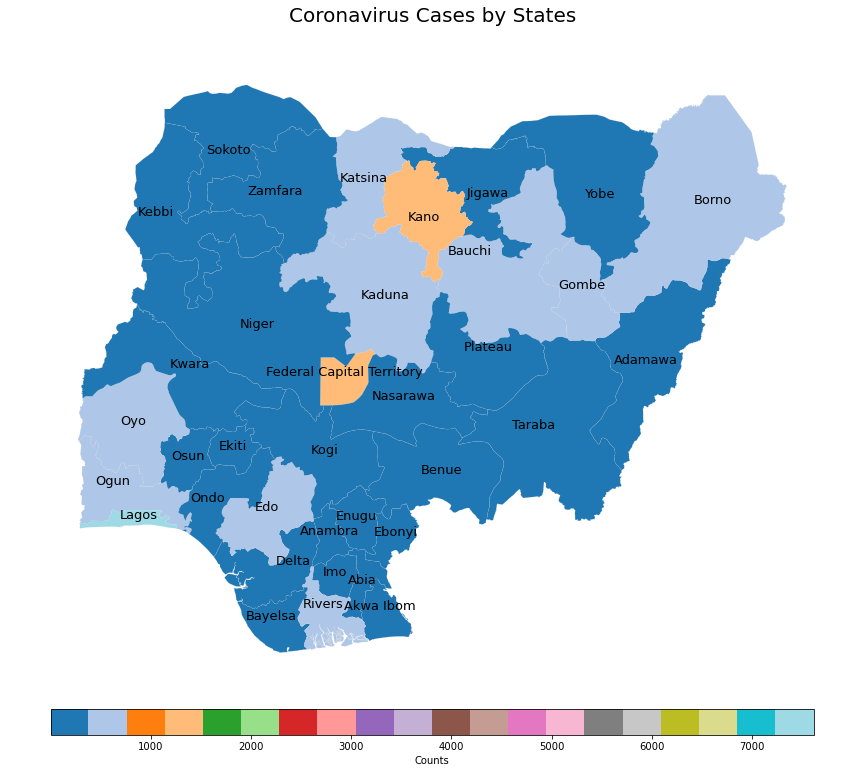

In [33]:
# Plot geomap for cases
visual(data, 'Cases', 'tab20')

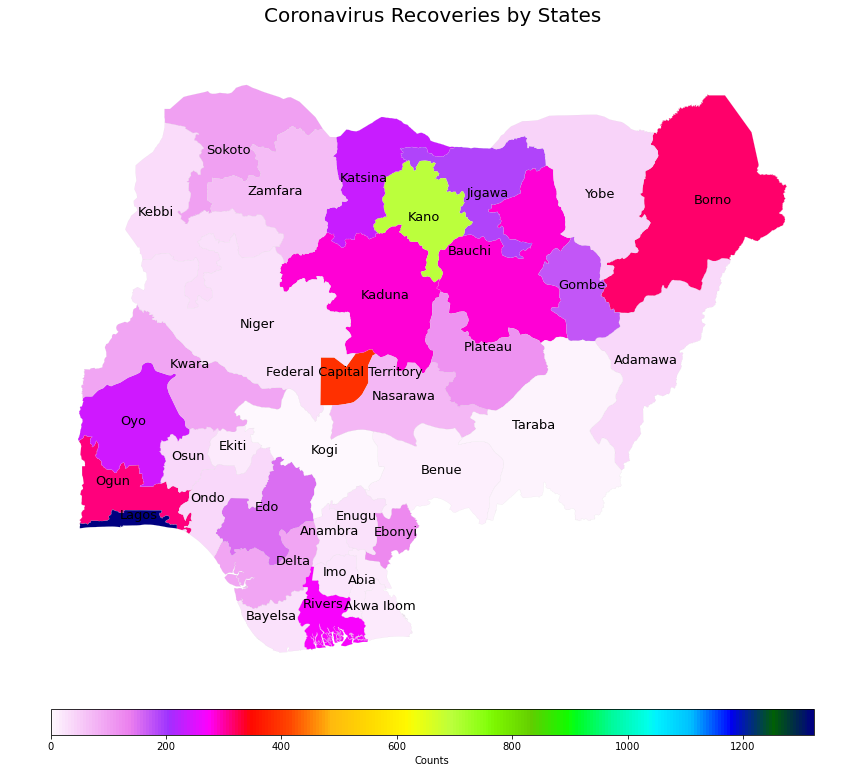

In [34]:
# Plot geomap for recoveries
visual(data, 'Recoveries', 'gist_ncar_r')

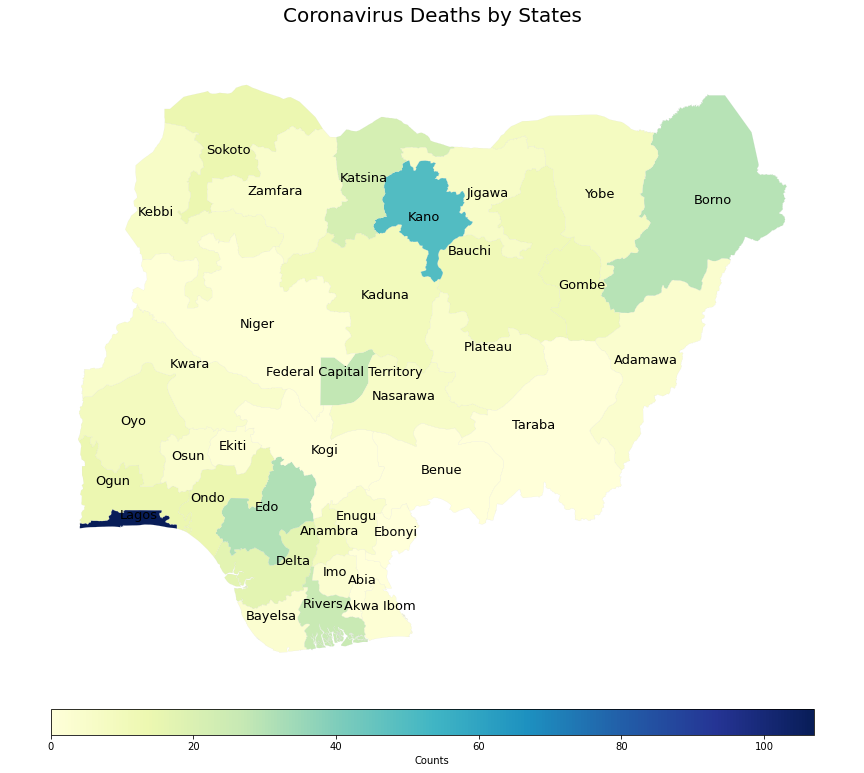

In [35]:
# Plot geomap for deaths
visual(data, 'Deaths', 'YlGnBu')

<h1 align='center'>Time Series Data</h1>

<p>Download data from Johns Hopkins University (JHU) Center for Systems Science and Engineering's (CSSE) GitHub repository</p>

In [36]:
cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [37]:
recovs = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [38]:
deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [39]:
# Read data into data frame
df_cases = pd.read_csv(cases)
df_recovs = pd.read_csv(recovs)
df_deaths = pd.read_csv(deaths)

In [40]:
# Extract confirmed cases data for Nigeria
df_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_cases.set_index('Country/Region', inplace=True)
df_cases = df_cases.loc['Nigeria']
df_cases = pd.DataFrame(df_cases)
df_cases.columns = ['Cases']
df_cases = df_cases.loc['2/28/20':]

In [41]:
# Extract recoveries data for Nigeria
df_recovs.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_recovs.set_index('Country/Region', inplace=True)
df_recovs = df_recovs.loc['Nigeria']
df_recovs = pd.DataFrame(df_recovs)
df_recovs.columns = ['Recoveries']
df_recovs = df_recovs.loc['2/28/20':]

In [42]:
# Extract death data for Nigeria
df_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_deaths.set_index('Country/Region', inplace=True)
df_deaths = df_deaths.loc['Nigeria']
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Deaths']
df_deaths = df_deaths.loc['2/28/20':]

In [43]:
# Merge cases, recoveriies and death data into one data frame
time_series = pd.concat([df_cases, df_recovs, df_deaths], axis=1, ignore_index=False)

In [44]:
# Rename columns
time_series.reset_index(inplace=True)
time_series.columns = ['Time', 'Cases', 'Recoveries', 'Deaths']

In [45]:
# Set time column type to datetime

#date = pd.date_range("1 22 2020", periods=time_series.shape[0], freq="D", name="date")
time_series['Time'] = pd.to_datetime(time_series['Time'], errors='coerce')

In [46]:
# Make time column index of the data frame
time_series.set_index('Time', inplace=True)

In [47]:
time_series = time_series.asfreq('D', method = 'ffill')

In [48]:
time_series.head()

,Cases,Recoveries,Deaths
Time,,,
2020-02-28,1,0,0
2020-02-29,1,0,0
2020-03-01,1,0,0
2020-03-02,1,0,0
2020-03-03,1,0,0


In [49]:
# Export time series data to csv
time_series.to_csv('time_series.csv')

In [50]:
# Import libraries for plotting
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.dates as mdates

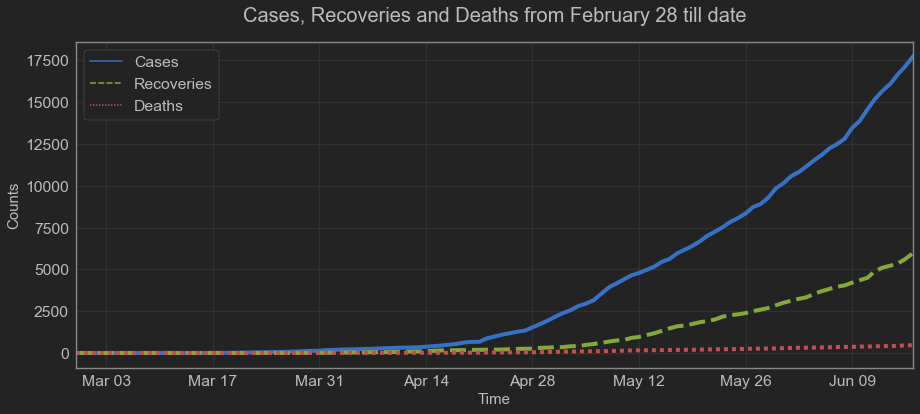

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
jtplot.style(theme='monokai', context='notebook', fscale=1.5, spines=True)
sns.lineplot(data=time_series, ax=ax, linewidth=4)
ax.set_title('Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('line-plot.png', dpi=150)

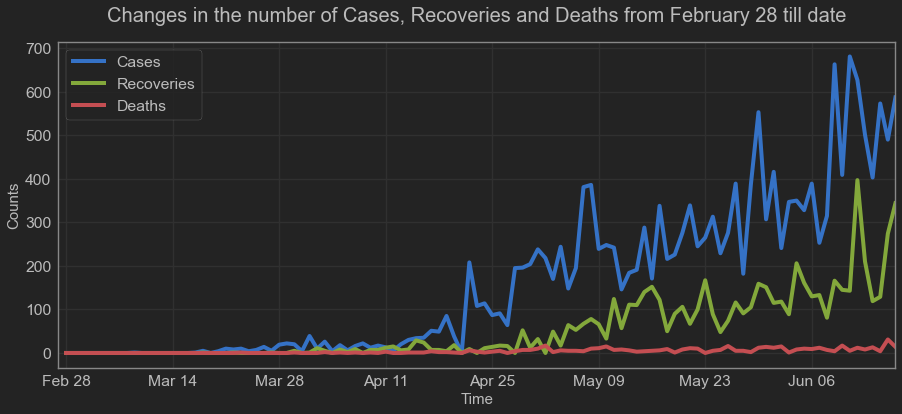

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
jtplot.style(theme='monokai', context='notebook', fscale=1.5, spines=True)
time_series.diff().plot(ax=ax, linewidth=4)
ax.set_title('Changes in the number of Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('time-lag.png', dpi=150)

In [53]:
time_series.index

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08',
               ...
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
               '2020-06-16', '2020-06-17'],
              dtype='datetime64[ns]', name='Time', length=111, freq='D')